<a href="https://colab.research.google.com/github/s00hyunkim/quora-insincere-questions/blob/main/text_classification_decision_tree_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model 1: Text Classification with `sklearn`

Our goal is to build a ML model that uses the features to predict the label:
- **Feature:** A bag of words (questions from Quora users; `question_text` in the `train.csv` and `test.csv` datasets)
- **Label (Binary):** Insincere (TRUE or FALSE; `target` in the `train.csv` dataset)

## Step 1: Import libraries

Ensure that all the required libraries have been installed by running `pip install <LIBRARY>` in the terminal.

In [1]:
import numpy as np 
import pandas as pd

from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import string
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,f1_score,roc_curve,make_scorer
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import os

import seaborn as sns
import time


stemmer=SnowballStemmer('english')
seed=5

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, f1_score

## Step 2: Load data

In [2]:
# loading train and test datasets

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

# printing the first 5 rows of train dataset
train.head()

# printing the first 5 rows of test dataset
test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


## Step 3: Perform Text Vectorization

Text Vectorization is the process of converting text into numerical representation.

For our use case, we are converting `question_text` to a matrix of TF-IDF (which measures the frequency of a word in a text against its overall frequency in the corpus) features.

In [3]:
text_vectorizer = TfidfVectorizer(max_features = 2000)

train_vector = text_vectorizer.fit_transform(train["question_text"])
test_vector = text_vectorizer.transform(test["question_text"])

## Step 4: Splitting X and Y into training and validation sets

As Quora provided the train and test datasets separately, there is no need to split X and Y into training and testing sets. Instead, X and Y are split into training and validation sets.

The `stratify` argument is used for Y to be split into training and validation sets as they are in the original dataset.

In [4]:
X_train,X_val,y_train,y_val = train_test_split(
    train_vector,
    train["target"],
    test_size=0.2,
    stratify=train["target"],
    random_state=42)

## Step 5: Choose classifiers

The three chosen classifers are the following models:

    - Decision Tree Classifier 

In [5]:
# setting up the DecisionTreeClassifier model
dtc_model = DecisionTreeClassifier(random_state=seed, max_depth=30)




## Step 6: Train the chosen classifiers and calculate metrics

The metrics that are used to analyze the performance are:

    - F-1 Score
    - ROC AUC Score

Along with these two scores, the confusion matrix is displayed with a _heatmap_.

[Text Classification using DecisionTreeClassifier(max_depth=30, random_state=5)]
   1) F1 score: 0.40
   2) ROC AUC score: 0.64
   3) ROC Curve


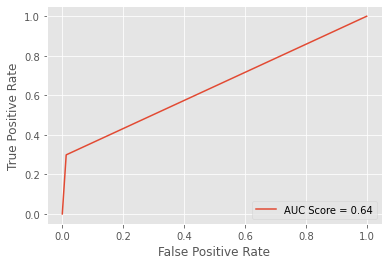

   4) Confusion Matrix


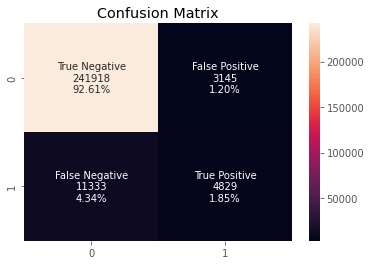

In [6]:
# scaling X
scaler_X = StandardScaler(with_mean=False)
X_train_scaled = scaler_X.fit_transform(X_train)
X_val_scaled = scaler_X.transform(X_val)

# creating a method that train the model, predict using the model, and calculate metrics
def model_and_predict(model, X_train_scaled, y_train, X_val_scaled, y_val):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)

    f1 = f1_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_pred)
    auc = roc_auc_score(y_val, y_pred)
    conf_matrix = confusion_matrix(y_val, y_pred)

    print("[Text Classification using %s]"%(model))
    print("   1) F1 score: %.2f"%(f1))
    print("   2) ROC AUC score: %.2f"%(auc))
    print("   3) ROC Curve")
    plt.plot(fpr, tpr, label='AUC Score = %.2f'%(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    print("   4) Confusion Matrix")
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten()/np.sum(conf_matrix)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(conf_matrix, annot=labels, fmt='')
    plt.title("Confusion Matrix")
    plt.show()
  



# calling method above for every model
baseline_models = [dtc_model]
for model in baseline_models:
    model_and_predict(model, X_train_scaled, y_train, X_val_scaled, y_val)
     

